In [1]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
import glob
from collections import defaultdict

In [2]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

In [6]:
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*") 
exp155 = get_data(exp155_files, "correct")

exp160_p01_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p01_*") 
exp160_p01 = get_data(exp160_p01_files, "correct")

exp160_p05_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p05_*") 
exp160_p05 = get_data(exp160_p05_files, "correct")

exp160_p1_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p1_*") 
exp160_p1 = get_data(exp160_p1_files, "correct")

exp160_p2_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp160_p2_*") 
exp160_p2 = get_data(exp160_p2_files, "correct")

In [8]:
exp160_p01

defaultdict(list,
            {'correct': [0.7921,
              0.8053,
              0.8025,
              0.8055,
              0.7878,
              0.7893,
              0.8018,
              0.8093,
              0.793,
              0.785,
              0.8064,
              0.8002,
              0.8062,
              0.7942,
              0.794,
              0.8014,
              0.8013,
              0.7961,
              0.8002,
              0.799]})

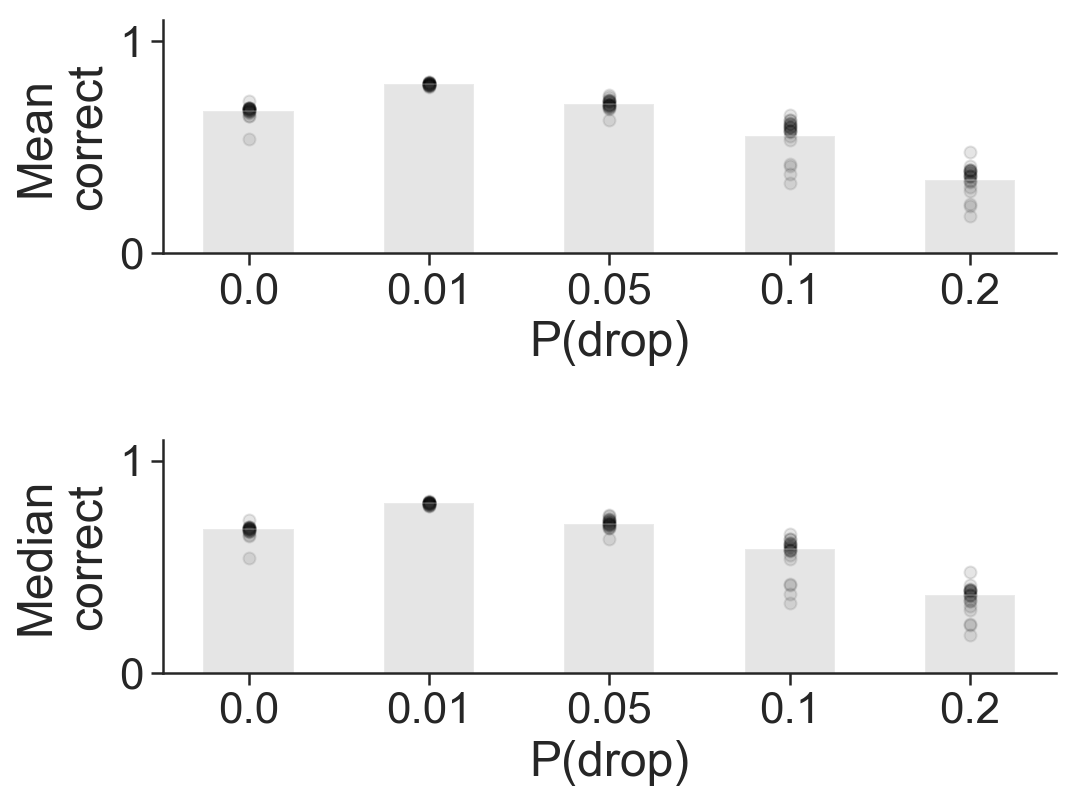

In [10]:
# -------------------------------------------------
# Est stats
model_names = ["0.0", "0.01", "0.05", "0.1", "0.2"]
models = [exp155, exp160_p01, exp160_p05, exp160_p1, exp160_p2]
medians = [
    np.median(exp155["correct"]), 
    np.median(exp160_p01["correct"]),
    np.median(exp160_p05["correct"]),
    np.median(exp160_p1["correct"]),
    np.median(exp160_p2["correct"]),
]

means = [
    np.mean(exp155["correct"]), 
    np.mean(exp160_p01["correct"]),
    np.mean(exp160_p05["correct"]),
    np.mean(exp160_p1["correct"]),
    np.mean(exp160_p2["correct"]),
]

# -------------------------------------------------
# Visualize 
fig = plt.figure(figsize=(8, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.5)
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Mean\ncorrect")
plt.xlabel("P(drop)")
_ = sns.despine()

# Median
plt.subplot(grid[1, 0])
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.5)
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Median\ncorrect")
plt.xlabel("P(drop)")
_ = sns.despine()